In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pydataset import data

import wrangle
import seaborn as sns

In [2]:
tips = data('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


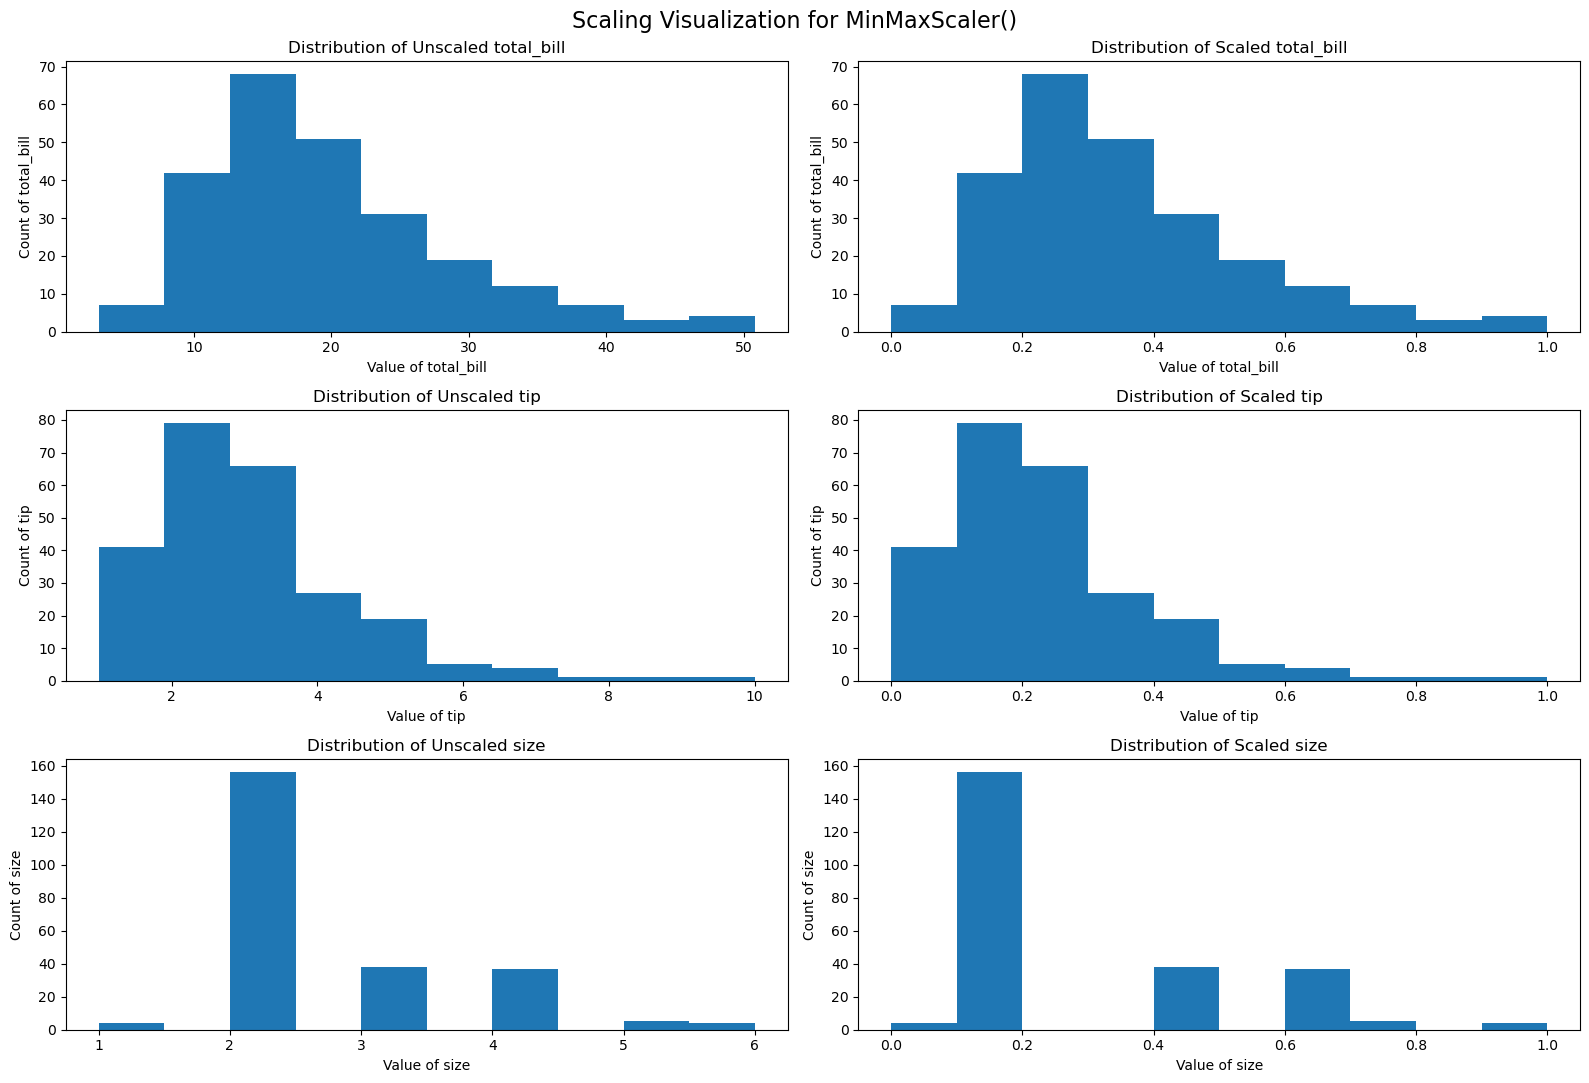

In [5]:
wrangle.scale_and_vis(MinMaxScaler(), tips, columns=['total_bill', 'tip', 'size'])

In [6]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale,
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values, 
                                                  index = train.index)
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [7]:
# split that data!
train_val, test = train_test_split(tips,
                                   train_size=0.8,
                                   random_state=1349)
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349)
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

In [8]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, columns_to_scale = ['total_bill', 'tip'])

In [9]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 52 to 155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  136 non-null    float64
 1   tip         136 non-null    float64
 2   sex         136 non-null    object 
 3   smoker      136 non-null    object 
 4   day         136 non-null    object 
 5   time        136 non-null    object 
 6   size        136 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 8.5+ KB


In [10]:
train_scaled = pd.concat(
[train_scaled, pd.get_dummies(train_scaled[['sex', 'smoker', 'day', 'time']],
                     drop_first=True)], axis=1)

validate_scaled = pd.concat(
[validate_scaled, pd.get_dummies(validate_scaled[['sex', 'smoker', 'day', 'time']],
                     drop_first=True)], axis=1)

test_scaled = pd.concat(
[test_scaled, pd.get_dummies(test_scaled[['sex', 'smoker', 'day', 'time']],
                     drop_first=True)], axis=1)



In [11]:
train_scaled.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
52,0.100755,0.177778,Female,No,Sun,Dinner,2,0,0,0,1,0,0
47,0.365735,0.444444,Male,No,Sun,Dinner,2,1,0,0,1,0,0
108,0.431869,0.365556,Male,Yes,Sat,Dinner,2,1,1,1,0,0,0
87,0.161562,0.111111,Male,No,Thur,Lunch,2,1,0,0,0,1,1
59,0.121838,0.084444,Male,Yes,Sat,Dinner,2,1,1,1,0,0,0


In [12]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
52,10.29,2.60,Female,No,Sun,Dinner,2
47,22.23,5.00,Male,No,Sun,Dinner,2
108,25.21,4.29,Male,Yes,Sat,Dinner,2
87,13.03,2.00,Male,No,Thur,Lunch,2
59,11.24,1.76,Male,Yes,Sat,Dinner,2


Univariate assessment of feature sex:


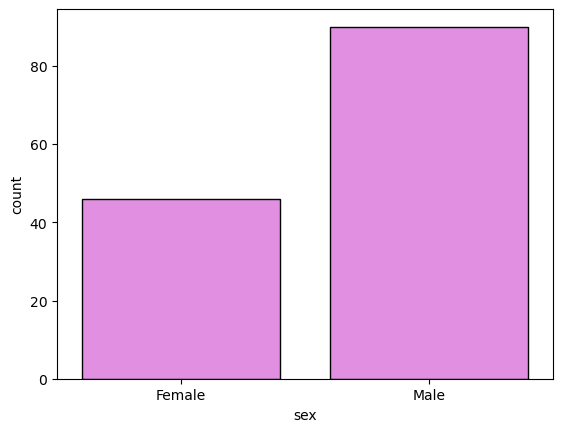

Univariate assessment of feature smoker:


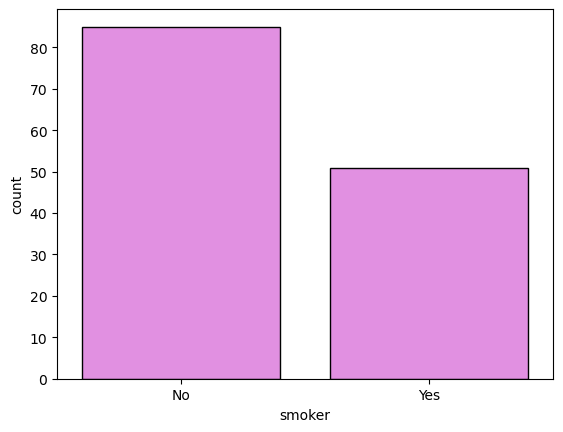

Univariate assessment of feature day:


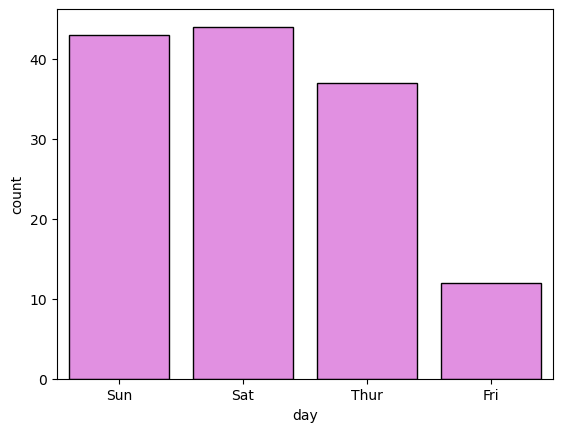

Univariate assessment of feature time:


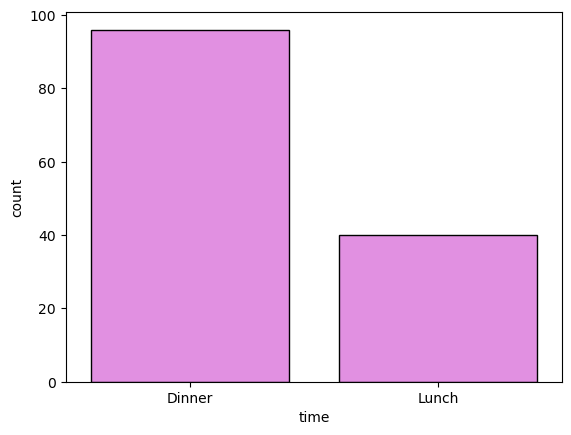

Univariate feature analysis of feature total_bill: 


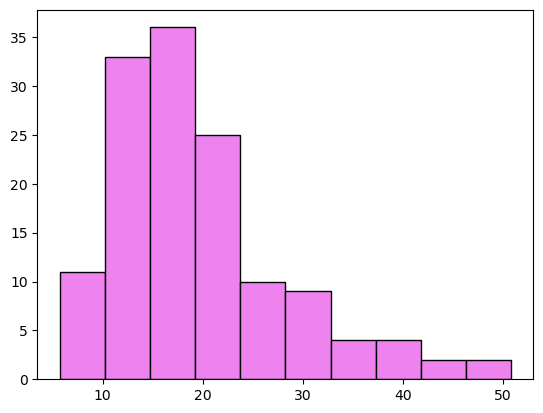

Univariate feature analysis of feature tip: 


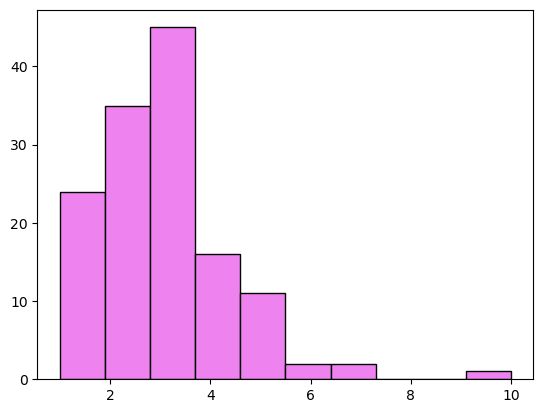

Univariate feature analysis of feature size: 


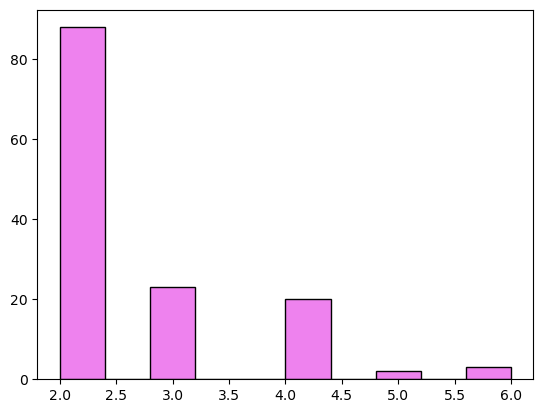

_____________________________________________________
_____________________________________________________



In [13]:
wrangle.univariate_visulization(train)

Numeric Columns: ['total_bill', 'tip']
Categorical Columns: ['sex', 'smoker', 'day', 'time', 'size']
Bivariate assessment of feature sex:


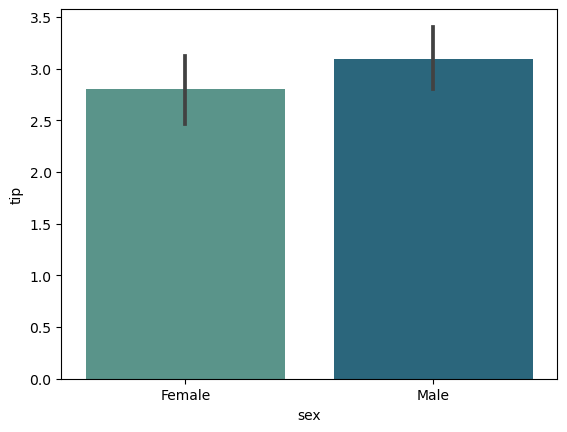

Bivariate assessment of feature smoker:


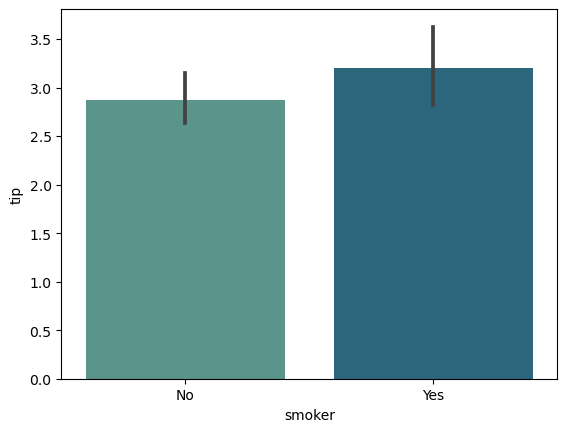

Bivariate assessment of feature day:


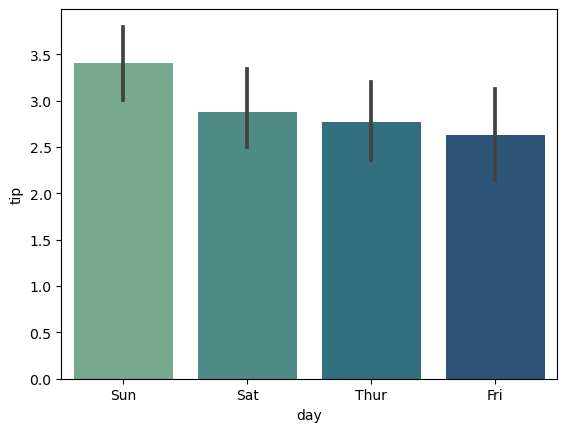

Bivariate assessment of feature time:


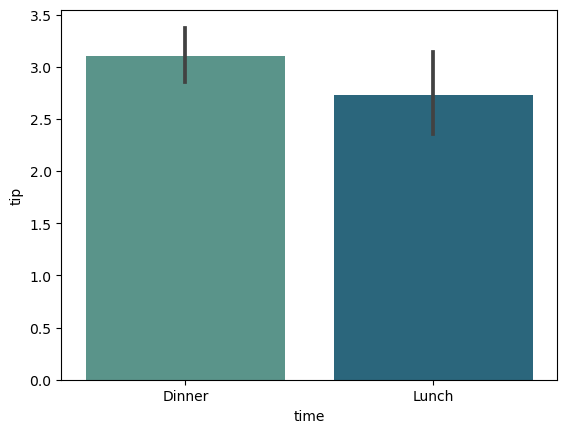

Bivariate assessment of feature size:


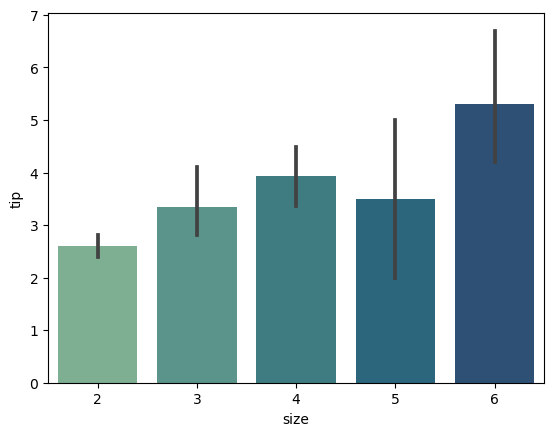

Bivariate feature analysis of feature total_bill: 


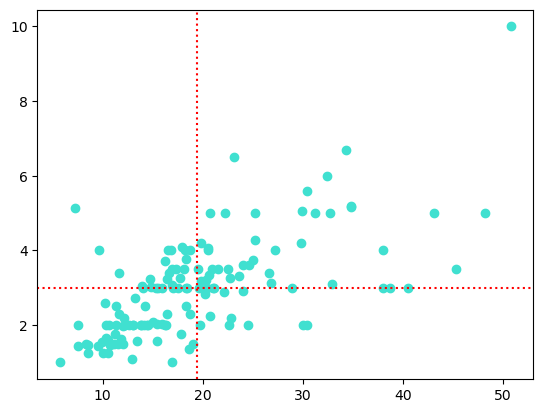

_____________________________________________________
_____________________________________________________



In [14]:
wrangle.bivariate_visulization(train, 'tip')

In [15]:
model_feats = ['size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch', 'total_bill']

In [16]:
train_scaled.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
52,0.100755,0.177778,Female,No,Sun,Dinner,2,0,0,0,1,0,0
47,0.365735,0.444444,Male,No,Sun,Dinner,2,1,0,0,1,0,0
108,0.431869,0.365556,Male,Yes,Sat,Dinner,2,1,1,1,0,0,0
87,0.161562,0.111111,Male,No,Thur,Lunch,2,1,0,0,0,1,1
59,0.121838,0.084444,Male,Yes,Sat,Dinner,2,1,1,1,0,0,0


In [17]:
X_train, y_train = train_scaled.drop(columns='tip'), train_scaled[['tip']]

X_val, y_val = validate_scaled.drop(columns='tip'), validate_scaled[['tip']]

X_test, y_test = test_scaled.drop(columns='tip'), test_scaled[['tip']]

In [18]:
wrangle.select_kbest(X_train[model_feats], y_train, k=2)

The features selected with the k value set to 2 are as follows:
 ['size', 'total_bill']


,statistical_f_values,p_values,selected
size,32.788834,6.448068e-08,True
sex_Male,1.428507,2.341193e-01,False
smoker_Yes,1.975431,1.621869e-01,False
day_Sat,0.514306,4.745291e-01,False
day_Sun,6.151601,1.436878e-02,False
day_Thur,1.349429,2.474430e-01,False
time_Lunch,2.092073,1.504001e-01,False
total_bill,98.899882,8.610316e-18,True


In [19]:
wrangle.rfe(X_train[model_feats], y_train, n=2)

The 2 features selected are as follows:
 ['day_Sun', 'total_bill']


,feature_ranking,selected
size,2,False
sex_Male,6,False
smoker_Yes,3,False
day_Sat,7,False
day_Sun,1,True
day_Thur,4,False
time_Lunch,5,False
total_bill,1,True


In [20]:
print(f"""Train shape: {X_train.shape}
Validate shape: {X_val.shape}
Test shape: {X_test.shape}
""")

Train shape: (136, 12)
Validate shape: (59, 12)
Test shape: (49, 12)



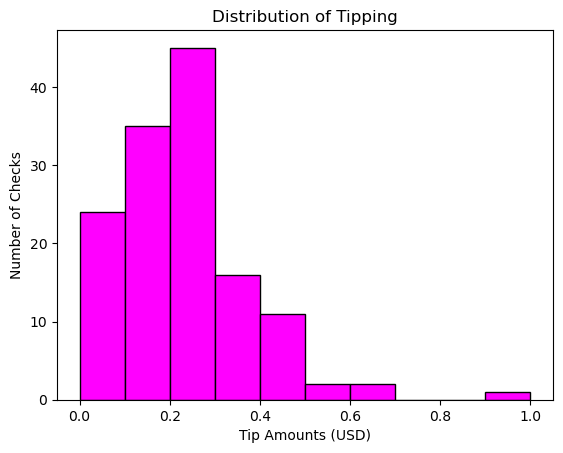

In [21]:
plt.hist(y_train, color='magenta', edgecolor='black')
plt.title('Distribution of Tipping')
plt.xlabel("Tip Amounts (USD)")
plt.ylabel("Number of Checks")

plt.show()

# BASELINE

In [22]:
# 1. Predict the tip mean 

tip_pred_mean = y_train['tip'].mean()
y_train['tip_pred_mean'] = tip_pred_mean
y_val['tip_pred_mean'] = tip_pred_mean

In [23]:
# 2. Predict the tip median

tip_pred_median = y_train['tip'].median()
y_train['tip_pred_median'] = tip_pred_median
y_val['tip_pred_median'] = tip_pred_median

In [24]:
# 3. RMSE of tip_pred_mean
rmse_train_mu = mean_squared_error(y_train.tip,
                                y_train.tip_pred_mean) ** .5

rmse_validate_mu = mean_squared_error(y_val.tip, y_val.tip_pred_mean) ** (0.5)

print(f"""RMSE using Mean
Train/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 0.15 
Validate/Out-of-Sample: 0.18


In [25]:
# 4. RMSE of tip_pred_median
rmse_train_med = mean_squared_error(y_train.tip, y_train.tip_pred_median) ** .5
rmse_validate_med = mean_squared_error(y_val.tip, y_val.tip_pred_median) ** (0.5)

print(f"""RMSE using Median
Train/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

RMSE using Median
Train/In-Sample: 0.15 
Validate/Out-of-Sample: 0.17


In [26]:
# looks like were rolling with the median!

In [27]:
# Let's house our metrics in a df to later compare

metric_df = pd.DataFrame(data=[
    {'model': 'mean_baseline',
     'RMSE_train': rmse_train_mu,
     'RMSE_validate': rmse_validate_mu,
     'R2_validate': explained_variance_score(y_val.tip,
                                             y_val.tip_pred_mean)
    }
]
)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.149007,0.175015,2.220446e-16


In [28]:
y_train.head()

,tip,tip_pred_mean,tip_pred_median
52,0.177778,0.221454,0.222222
47,0.444444,0.221454,0.222222
108,0.365556,0.221454,0.222222
87,0.111111,0.221454,0.222222
59,0.084444,0.221454,0.222222


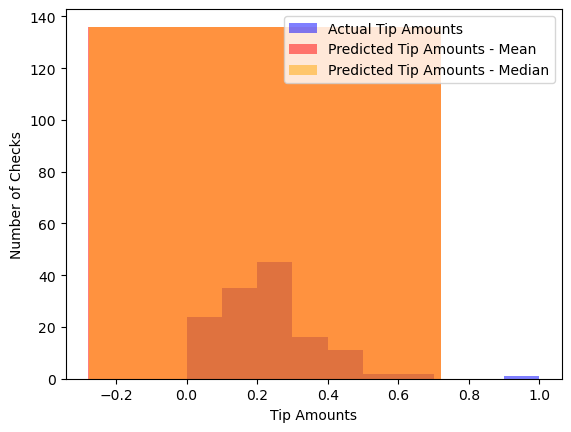

In [29]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.tip, color='blue', alpha=.5, label="Actual Tip Amounts")
plt.hist(y_train.tip_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Tip Amounts - Mean")
plt.hist(y_train.tip_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Tip Amounts - Median")
plt.xlabel("Tip Amounts")
plt.ylabel("Number of Checks")
plt.legend()
plt.show()

# Modeling

#### LinearRegression (OLS)

In [30]:
# MAKE THE THING: create the model object
lm = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = lm.fit(X_train[model_feats], y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_lm'] = lm.predict(X_train[model_feats])

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm)**(1/2)

In [31]:
#4. REPEAT STEPS 2-3

# predict validate
y_val['tip_pred_lm'] = lm.predict(X_val[model_feats])


# evaluate: RMSE
rmse_validate = mean_squared_error(y_val.tip, y_val.tip_pred_lm)**(1/2)


print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  0.1112424182219456 
Validation/Out-of-Sample: 0.10230157506595304


In [32]:
metric_df = metric_df.append(
    
    {'model': 'OLS_Regressor',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_val.tip,
                                             y_val.tip_pred_lm)
    }, ignore_index=True

)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.149007,0.175015,2.220446e-16
1,OLS_Regressor,0.111242,0.102302,6.538158e-01


In [33]:
OLSmodel.coef_

array([ 0.01699552,  0.00594269,  0.01882717,  0.00334754,  0.0347108 ,
        0.02611942, -0.01368183,  0.43108313])

In [34]:
OLSmodel.intercept_

0.019988847935725834

#### LassoLars

In [37]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=.001)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(X_train[model_feats], y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_lars'] = lars.predict(X_train[model_feats])

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lars) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_val['tip_pred_lars'] = lars.predict(X_val[model_feats])

# evaluate: RMSE
rmse_validate = mean_squared_error(y_val.tip, y_val.tip_pred_lars) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.11271900225053022, 
Validation/Out-of-Sample:  0.10329187441207055
Difference:  -0.00942712783845967


In [38]:
lars.coef_

array([0.00877008, 0.        , 0.        , 0.        , 0.00661121,
       0.        , 0.        , 0.41285847])

In [39]:
lars.intercept_

0.07092844838177761

In [41]:
#Append
metric_df = metric_df.append(
    {'model': 'lasso_alpha0.001',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_val.tip,
                                             y_val.tip_pred_lars)
    }, ignore_index=True)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.149007,0.175015,2.220446e-16
1,OLS_Regressor,0.111242,0.102302,6.538158e-01
2,lasso_alpha0.001,0.112719,0.103292,6.474610e-01
3,lasso_alpha0.001,0.112719,0.103292,6.474610e-01


In [42]:
metric_df = metric_df.drop(3)

In [43]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.149007,0.175015,2.220446e-16
1,OLS_Regressor,0.111242,0.102302,6.538158e-01
2,lasso_alpha0.001,0.112719,0.103292,6.474610e-01


#### TweedieRegressor (GLM:Generalized Linear Model)

In [47]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power=1, alpha=0)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
glm.fit(X_train[model_feats], y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_glm'] = glm.predict(X_train[model_feats])

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_glm) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_val['tip_pred_glm'] = glm.predict(X_val[model_feats])

# evaluate: RMSE
rmse_validate = mean_squared_error(y_val.tip, y_val.tip_pred_glm) ** (1/2)\

print(f"""RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: 0.1167261689366623, 
Validation/Out-of-Sample:  0.10246947161067442
Difference:  -0.014256697325987874


In [48]:
#Append
metric_df = metric_df.append(
    {'model': 'glm_poisson',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_val.tip,
                                             y_val.tip_pred_glm)
    }, ignore_index=True)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.149007,0.175015,2.220446e-16
1,OLS_Regressor,0.111242,0.102302,6.538158e-01
2,lasso_alpha0.001,0.112719,0.103292,6.474610e-01
3,glm_poisson,0.116726,0.102469,6.526010e-01
